In [78]:
# Comparing accuracies of different runs by plotting both on same graph
# A LOT OF PLOTS

In [2]:
# import relevant modules
import pickle as pkl
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.utils.vis_utils import plot_model
from coord import CoordinateChannel2D
print(tf.__version__)

1.15.5


Using TensorFlow backend.


In [146]:
# Comparing different model versions

location_1 = 'no coordconv/with_decay_nesterov'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_1), 'rb') as f:
    old_model_history = pkl.load(f)
location_2 = 'gpu runs/old_with_batch_norm'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_2), 'rb') as f:
    old_model_bn_history = pkl.load(f)
location_3 = 'gpu runs/old_with_batch_norm/no_conv_dropout'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_3), 'rb') as f:
    old_model_bn_no_drop_history = pkl.load(f)
location_4 = 'gpu runs/old_with_batch_norm/one_batch_norm'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_4), 'rb') as f:
    one_bn_history = pkl.load(f)
print(old_model_history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'categorical_accuracy', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_categorical_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

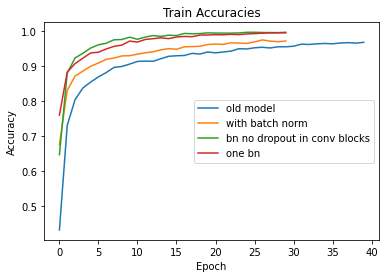

In [147]:
plt.figure()
plt.plot(old_model_history['categorical_accuracy'])
plt.plot(old_model_bn_history['categorical_accuracy'])
plt.plot(old_model_bn_no_drop_history['categorical_accuracy'])
plt.plot(one_bn_history['categorical_accuracy'])
plt.title('Train Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'with batch norm', 'bn no dropout in conv blocks', 'one bn'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

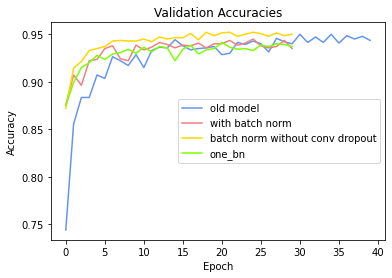

In [322]:
plt.figure()
plt.plot(old_model_history['val_categorical_accuracy'], 'cornflowerblue')
plt.plot(old_model_bn_history['val_categorical_accuracy'], 'lightcoral')
plt.plot(old_model_bn_no_drop_history['val_categorical_accuracy'], 'gold')
plt.plot(one_bn_history['val_categorical_accuracy'], 'chartreuse')
plt.title('Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'with batch norm', 'batch norm without conv dropout', 'one_bn'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

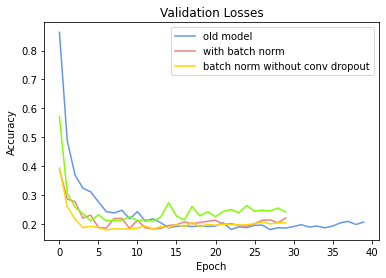

In [83]:
plt.figure()
plt.plot(old_model_history['val_loss'], 'cornflowerblue')
plt.plot(old_model_bn_history['val_loss'], 'lightcoral')
plt.plot(old_model_bn_no_drop_history['val_loss'], 'gold')
plt.plot(one_bn_history['val_loss'], 'chartreuse')
plt.title('Validation Losses')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'with batch norm', 'batch norm without conv dropout'], loc='upper right')
plt.show

In [325]:
print(min(old_model_bn_no_drop_history['val_loss']))
print(min(old_model_history['val_loss']))

0.17858989747972892
0.17959948227507994


<function matplotlib.pyplot.show(close=None, block=None)>

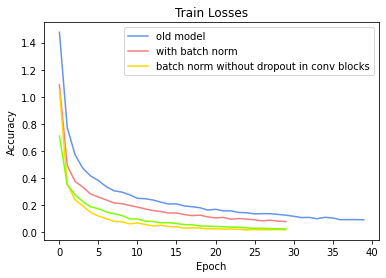

In [84]:
plt.figure()
plt.plot(old_model_history['loss'], 'cornflowerblue')
plt.plot(old_model_bn_history['loss'], 'lightcoral')
plt.plot(old_model_bn_no_drop_history['loss'], 'gold')
plt.plot(one_bn_history['loss'], 'chartreuse')
plt.title('Train Losses')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'with batch norm', 'batch norm without dropout in conv blocks'], loc='upper right')
plt.show

In [326]:
# Different batch norm implementations
location_1 = 'gpu runs/old_with_batch_norm/batch_norm_pre_pool'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_1), 'rb') as f:
    pre_pool_history = pkl.load(f)
location_2 = 'gpu runs/old_with_batch_norm/pre_pool_fewer_nodes'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_2), 'rb') as f:
    pre_pool_fewer_nodes_history = pkl.load(f)

In [328]:
print(min(pre_pool_history['val_loss']))
print(max(pre_pool_history['val_categorical_accuracy']))

0.17421434171098685
0.94785714


<function matplotlib.pyplot.show(close=None, block=None)>

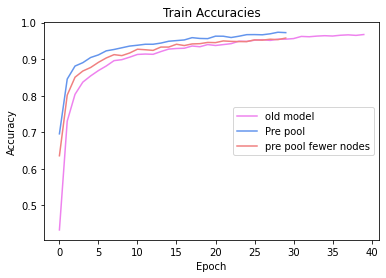

In [86]:
plt.figure()
plt.plot(old_model_history['categorical_accuracy'], 'violet')
plt.plot(pre_pool_history['categorical_accuracy'], 'cornflowerblue')
plt.plot(pre_pool_fewer_nodes_history['categorical_accuracy'], 'lightcoral')
plt.title('Train Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'Pre pool', 'pre pool fewer nodes'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

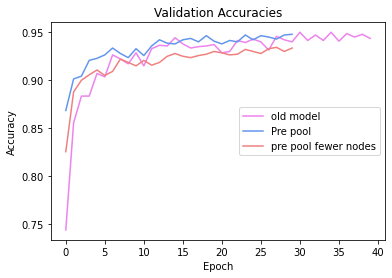

In [87]:
plt.figure()
plt.plot(old_model_history['val_categorical_accuracy'], 'violet')
plt.plot(pre_pool_history['val_categorical_accuracy'], 'cornflowerblue')
plt.plot(pre_pool_fewer_nodes_history['val_categorical_accuracy'], 'lightcoral')
plt.title('Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['old model', 'Pre pool', 'pre pool fewer nodes'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

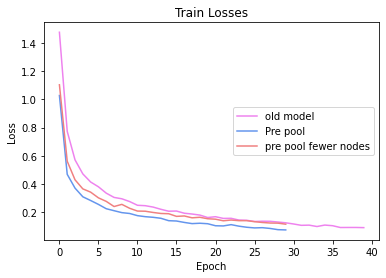

In [88]:
plt.figure()
plt.plot(old_model_history['loss'], 'violet')
plt.plot(pre_pool_history['loss'], 'cornflowerblue')
plt.plot(pre_pool_fewer_nodes_history['loss'], 'lightcoral')
plt.title('Train Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['old model', 'Pre pool', 'pre pool fewer nodes'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

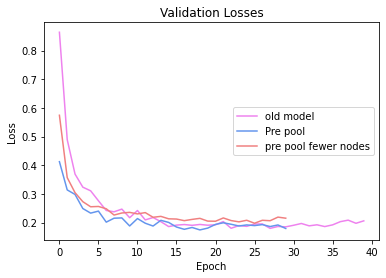

In [89]:
plt.figure()
plt.plot(old_model_history['val_loss'], 'violet')
plt.plot(pre_pool_history['val_loss'], 'cornflowerblue')
plt.plot(pre_pool_fewer_nodes_history['val_loss'], 'lightcoral')
plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['old model', 'Pre pool', 'pre pool fewer nodes'], loc='center right')
plt.show

In [90]:
# with and without coordconv
location_1 = 'no coordconv/with_decay_nesterov'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_1), 'rb') as f:
    no_coord_history = pkl.load(f)
location_2 = 'coordconv/run2'
with open('{}/HengguiCNN/History_CNN_less_classes_less_norm.pkl'.format(location_2), 'rb') as f:
    coord_history = pkl.load(f)
print(old_model_history.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'categorical_accuracy', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_categorical_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

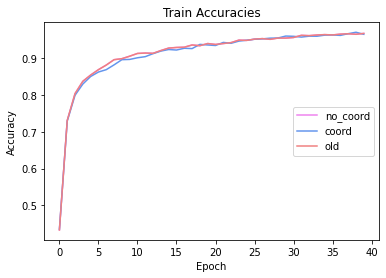

In [91]:
plt.figure()
plt.plot(no_coord_history['categorical_accuracy'], 'violet')
plt.plot(coord_history['categorical_accuracy'], 'cornflowerblue')
plt.plot(old_model_history['categorical_accuracy'], 'lightcoral')
plt.title('Train Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_coord', 'coord', 'old'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

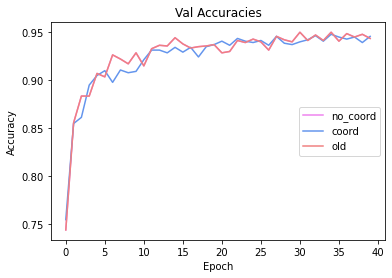

In [92]:
plt.figure()
plt.plot(no_coord_history['val_categorical_accuracy'], 'violet')
plt.plot(coord_history['val_categorical_accuracy'], 'cornflowerblue')
plt.plot(old_model_history['val_categorical_accuracy'], 'lightcoral')
plt.title('Val Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['no_coord', 'coord', 'old'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

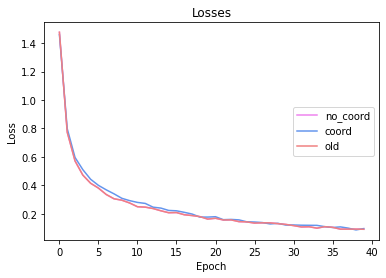

In [93]:
plt.figure()
plt.plot(no_coord_history['loss'], 'violet')
plt.plot(coord_history['loss'], 'cornflowerblue')
plt.plot(old_model_history['loss'], 'lightcoral')
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['no_coord', 'coord', 'old'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

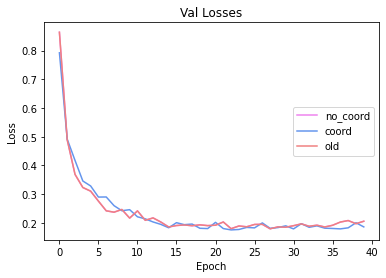

In [94]:
plt.figure()
plt.plot(no_coord_history['val_loss'], 'violet')
plt.plot(coord_history['val_loss'], 'cornflowerblue')
plt.plot(old_model_history['val_loss'], 'lightcoral')
plt.title('Val Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['no_coord', 'coord', 'old'], loc='center right')
plt.show

In [141]:
# Different momentum runs
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.5), 'rb') as f:
    mom_5 = pkl.load(f)
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.6), 'rb') as f:
    mom_6 = pkl.load(f)
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.7), 'rb') as f:
    mom_7 = pkl.load(f)
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.8), 'rb') as f:
    mom_8 = pkl.load(f)
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.9), 'rb') as f:
    mom_9 = pkl.load(f)
with open('momentum_runs/history_saves/mom_{}_history.pkl'.format(0.99), 'rb') as f:
    mom_99 = pkl.load(f)

In [142]:
print(mom_5.keys())

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'categorical_accuracy', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_categorical_accuracy'])


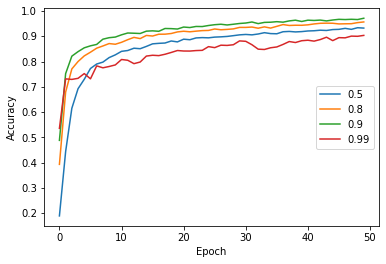

In [154]:
plt.figure()
plt.plot(mom_5['categorical_accuracy'])
#plt.plot(mom_6['categorical_accuracy'], 'cornflowerblue')
#plt.plot(mom_7['categorical_accuracy'], 'lightcoral')
plt.plot(mom_8['categorical_accuracy'])
plt.plot(mom_9['categorical_accuracy'])
plt.plot(mom_99['categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0.5', '0.8', '0.9', '0.99'], loc='center right')
plt.savefig('Momentum_Train_accuracies.pdf')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

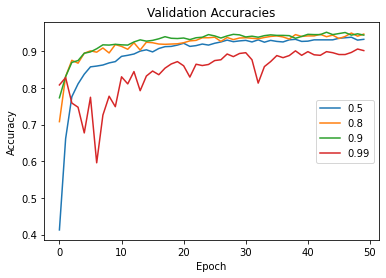

In [329]:
plt.figure()
plt.plot(mom_5['val_categorical_accuracy'])
#plt.plot(mom_6['val_categorical_accuracy'], 'cornflowerblue')
#plt.plot(mom_7['val_categorical_accuracy'], 'lightcoral')
plt.plot(mom_8['val_categorical_accuracy'])
plt.plot(mom_9['val_categorical_accuracy'])
plt.plot(mom_99['val_categorical_accuracy'])
plt.title('Validation Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0.5', '0.8', '0.9', '0.99'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

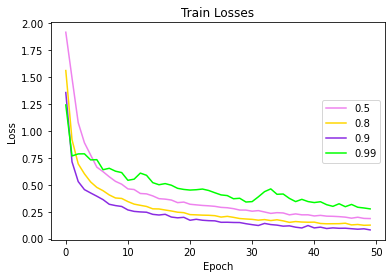

In [121]:
plt.figure()
plt.plot(mom_5['loss'], 'violet')
#plt.plot(mom_6['loss'], 'cornflowerblue')
#plt.plot(mom_7['loss'], 'lightcoral')
plt.plot(mom_8['loss'], 'gold')
plt.plot(mom_9['loss'], 'blueviolet')
plt.plot(mom_99['loss'], 'lime')
plt.title('Train Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['0.5', '0.8', '0.9', '0.99'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

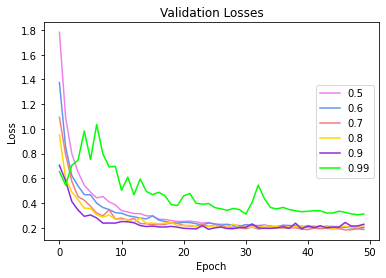

In [115]:
plt.figure()
plt.plot(mom_5['val_loss'], 'violet')
plt.plot(mom_6['val_loss'], 'cornflowerblue')
plt.plot(mom_7['val_loss'], 'lightcoral')
plt.plot(mom_8['val_loss'], 'gold')
plt.plot(mom_9['val_loss'], 'blueviolet')
plt.plot(mom_99['val_loss'], 'lime')
plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['0.5', '0.6', '0.7', '0.8', '0.9', '0.99'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

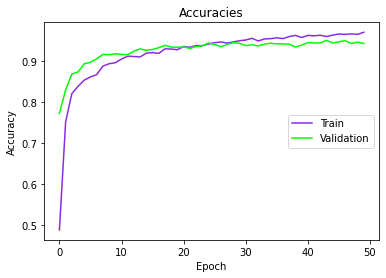

In [116]:
plt.figure()
plt.plot(mom_9['categorical_accuracy'], 'blueviolet')
plt.plot(mom_9['val_categorical_accuracy'], 'lime')
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

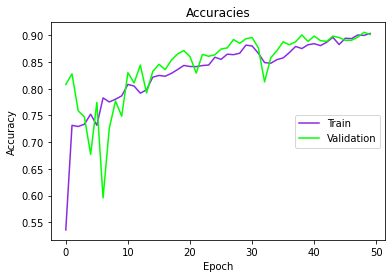

In [122]:
plt.figure()
plt.plot(mom_99['categorical_accuracy'], 'blueviolet')
plt.plot(mom_99['val_categorical_accuracy'], 'lime')
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show

In [151]:
# learning rate runs

with open('lr_runs/history_saves/lr_{}_history.pkl'.format(0.1), 'rb') as f:
    lr_pt1 = pkl.load(f)
with open('lr_runs/history_saves/lr_{}_history.pkl'.format(0.01), 'rb') as f:
    lr_pt01 = pkl.load(f)
with open('lr_runs/history_saves/lr_{}_history.pkl'.format(0.001), 'rb') as f:
    lr_pt001 = pkl.load(f)
with open('lr_runs/history_saves/lr_{}_history.pkl'.format(0.0001), 'rb') as f:
    lr_pt0001 = pkl.load(f)
with open('lr_runs/history_saves/lr_{}_history.pkl'.format(0.00001), 'rb') as f:
    lr_pt00001 = pkl.load(f)

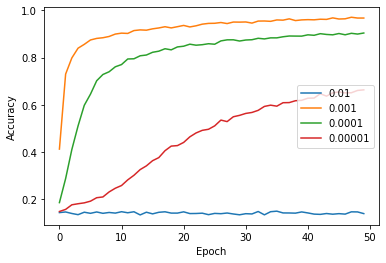

In [155]:
plt.figure()
plt.plot(lr_pt1['categorical_accuracy'])
#plt.plot(lr_pt01['categorical_accuracy'], 'deepskyblue')
plt.plot(lr_pt001['categorical_accuracy'])
plt.plot(lr_pt0001['categorical_accuracy'])
plt.plot(lr_pt00001['categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0.01', '0.001', '0.0001', '0.00001'], loc='center right')
plt.savefig('LearningRate_train_accuracies.pdf', dpi=1200)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

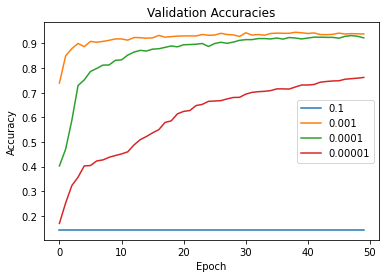

In [333]:
plt.figure()
plt.plot(lr_pt1['val_categorical_accuracy'])
#plt.plot(lr_pt01['val_categorical_accuracy'], 'b')
plt.plot(lr_pt001['val_categorical_accuracy'])
plt.plot(lr_pt0001['val_categorical_accuracy'])
plt.plot(lr_pt00001['val_categorical_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['0.01', '0.001', '0.0001', '0.00001'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

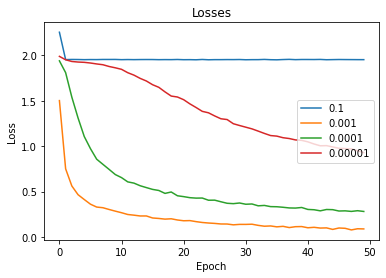

In [334]:
plt.figure()
plt.plot(lr_pt1['loss'])
#plt.plot(lr_pt01['val_loss'], 'b')
plt.plot(lr_pt001['loss'])
plt.plot(lr_pt0001['loss'])
plt.plot(lr_pt00001['loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['0.1', '0.001', '0.0001', '0.00001'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

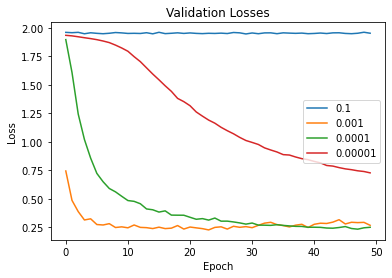

In [335]:
plt.figure()
plt.plot(lr_pt1['val_loss'])
#plt.plot(lr_pt01['val_loss'], 'b')
plt.plot(lr_pt001['val_loss'])
plt.plot(lr_pt0001['val_loss'])
plt.plot(lr_pt00001['val_loss'])
plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['0.1', '0.001', '0.0001', '0.00001'], loc='center right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

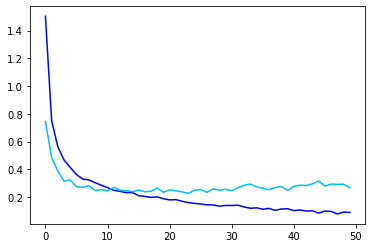

In [139]:
plt.figure()
plt.plot(lr_pt001['loss'], 'blue')
plt.plot(lr_pt001['val_loss'], 'deepskyblue')
plt.show

In [5]:
# function to calculate the average array of a kfold run
def av_of_kfold(all_arrays):
    av_array = []
    for i in range(len(all_arrays[0])):
        values = []
        for j in range(5):
            values.append(all_arrays[j][i])
        av_value = (sum(values)/5)
        av_array.append(av_value) 
    return av_array

In [3]:
# k fold average plots
plt.figure()
highlr_arrays=[]
lowlr_arrays=[]
chat_arrays=[]
chat2_arrays=[]
lr_stepdown_arrays=[]
metric = 'val_categorical_accuracy'
for i in range(5):
    print('fold ', i+1)
    with open('old_model_k_fold/lr1e-4/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        lowlr_arrays.append(fold[metric])
    #plt.plot(fold['val_loss'], '--c')
    #print(max(fold['categorical_accuracy']))
    with open('channel_attention/one block/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        chat_arrays.append(fold[metric])
    #print(max(fold['categorical_accuracy']))
    with open('old_model_k_fold/decay1e-5/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        highlr_arrays.append(fold[metric])
        #plt.plot(fold['val_categorical_accuracy'][0:50], '--y')
    #plt.plot(fold['val_loss'], '--b')
    #print(max(fold['categorical_accuracy']))
    with open('channel_attention/two blocks/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        chat2_arrays.append(fold[metric])
    """with open('channel_attention/decay1e-3/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        chat_high_decay_arrays.append(fold[metric])"""
    with open('channel_attention/lr stepdown/fold_history_saves/fold_{}_history.pkl'.format(i+1), 'rb') as f:
        fold = pkl.load(f)
        lr_stepdown_arrays.append(fold[metric])
    #plt.plot(fold['val_categorical_accuracy'], '--c')   

plt.plot(av_of_kfold(highlr_arrays))
#plt.plot(av_of_kfold(chat_arrays))
plt.plot(av_of_kfold(chat2_arrays))
#plt.plot(av_chat_values[0:50])
#plt.plot(av_chat2_values[:])
#plt.plot(av_chat_high_decay_values[0:50], 'y')
#plt.plot(av_of_kfold(lr_stepdown_arrays))

# With batch normalisation
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/with_bn/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[metric])
        #plt.plot(fold[metric], 'orange', lw = 0.5)
    fold_num+=1
plt.plot(av_of_kfold(run_arrays), 'r') 

with open('gpu runs/old_model/HengguiCNN/History_CNN_less_classes_less_norm.pkl', 'rb') as f:
    old_model_bn_history = pkl.load(f)
#plt.plot(old_model_bn_history[metric])

plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['without channel attention', 'with channel attention'], loc='center right')
plt.xlim([0,50])
plt.ylim([0.8,0.95])
plt.show()

#print('min val loss lr = 1e-3: {}'.format(min(av_high_values[0:50])))
#print('min val loss lr = 1e-4: {}'.format(min(av_low_values[:])))
#print('min val loss chat: {}'.format(min(av_chat_values[0:50])))
#print('min val loss chat2: {}'.format(min(av_chat2_values[0:50])))
#print('min val loss chat2 big decay: {}'.format(min(av_chat_high_decay_values[0:50])))
#print('min val loss lr stepdown: {}'.format(min(lr_stepdown_values[0:50])))
#print('min val loss bn no dropout: {}'.format(min(old_model_bn_no_drop_history['val_loss'])))

fold  1
fold  2
fold  3
fold  4
fold  5


NameError: name 'av_of_kfold' is not defined

<Figure size 432x288 with 0 Axes>

In [165]:
print(min(lr_pt001['val_loss']))

0.2266474383816655


In [166]:
print(min(lr_pt0001['val_loss']))

0.23313184581430896


node#:  10 fold  1
node#:  10 fold  2
node#:  10 fold  3
node#:  10 fold  4
node#:  10 fold  5
node#:  20 fold  6
node#:  20 fold  7
node#:  20 fold  8
node#:  20 fold  9
node#:  20 fold  10
node#:  40 fold  11
node#:  40 fold  12
node#:  40 fold  13
node#:  40 fold  14
node#:  40 fold  15
node#:  60 fold  16
node#:  60 fold  17
node#:  60 fold  18
node#:  60 fold  19
node#:  60 fold  20
node#:  80 fold  21
node#:  80 fold  22
node#:  80 fold  23
node#:  80 fold  24
node#:  80 fold  25
node#:  120 fold  26
node#:  120 fold  27
node#:  120 fold  28
node#:  120 fold  29
node#:  120 fold  30


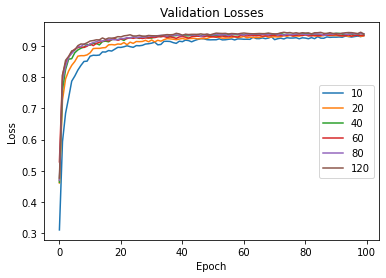

In [24]:
# plot runs with different numbers of nodes in penultimate dense layer
metric = 'val_categorical_accuracy'
fold_num = 1
node_nums = [10,20,40,60,80,120]

plt.figure()

for node_num in node_nums:
    run_arrays = []
    for i in range(5):
        print('node#: ', node_num, 'fold ', fold_num)
        with open('node_tests/{}_nodes_fold_history_saves/fold_{}_history.pkl'.format(node_num, fold_num), 'rb') as f:
            fold = pkl.load(f)
            run_arrays.append(fold[metric])
        fold_num+=1
    plt.plot(av_of_kfold(run_arrays))  
    
plt.title('Validation Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['10', '20', '40', '60', '80', '120'], loc='center right')
#plt.xlim([0,30])
#plt.ylim([0.15,0.3])
plt.show()
    

fold  1
fold  2
fold  3
fold  4
fold  5
fold  1
fold  2
fold  3
fold  4
fold  5
fold  1
fold  2
fold  3
fold  4
fold  5


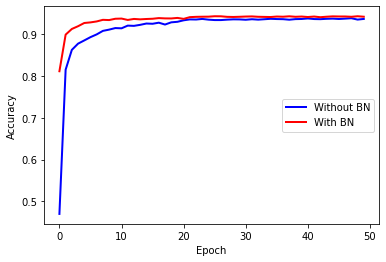

In [6]:
# plotting with and without batch normalisation in the channel attention model
metric = 'val_categorical_accuracy'
plt.figure()
# Without batch normalisation
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/without_bn/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[metric])
        #plt.plot(fold[metric], 'c', lw = 0.5)
    fold_num+=1
plt.plot(av_of_kfold(run_arrays), 'b', lw = 2) 

# With batch normalisation
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/with_bn/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[metric])
        #plt.plot(fold['categorical_accuracy'], 'orange', lw = 0.5)
    fold_num+=1
plt.plot(av_of_kfold(run_arrays), 'r', lw = 2) 

# With batch normalisation and weight regularisation
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/with_bn/with_L2/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[metric])
        #plt.plot(fold['categorical_accuracy'], 'chartreuse', lw = 0.5)
    fold_num+=1
#plt.plot(av_of_kfold(run_arrays), 'g', lw = 2) 

"""# With one batch normalisation layer
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/with_bn/one_bn/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[metric])
        #plt.plot(fold['categorical_accuracy'], 'chartreuse', lw = 0.5)
    fold_num+=1
plt.plot(av_of_kfold(run_arrays), 'violet', lw = 2)"""

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Without BN', 'With BN', 'With BN and L2 regularisation', 'One BN'], loc='center right')
#plt.xlim([-1,40])
#plt.ylim([0.6,1])
#plt.savefig('with_without_bn_train_accuracy.pdf')
plt.show()

fold  1
fold  2
fold  3
fold  4
fold  5


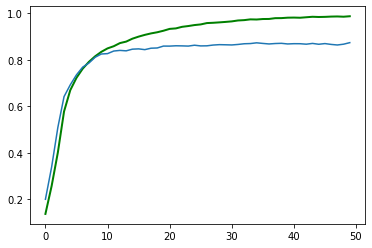

In [105]:
# 1D accuracies
metric = 'categorical_accuracy'
# 2D attention turned 1D
run_arrays_train = []
run_arrays_val = []
val_metric = 'val_' + metric
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('1DCNN/attention1D/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays_train.append(fold[metric])
        run_arrays_val.append(fold[val_metric])
        #plt.plot(fold[metric], 'chartreuse', lw = 0.5)
    fold_num+=1


plt.plot(av_of_kfold(run_arrays_train), 'g', lw = 2) 
plt.plot(av_of_kfold(run_arrays_val))

fold  1
fold  2
fold  3
fold  4
fold  5
fold  1
fold  2
fold  3
fold  4
fold  5
fold  1
fold  2
fold  3
fold  4
fold  5


TypeError: savefig() missing 1 required positional argument: 'fname'

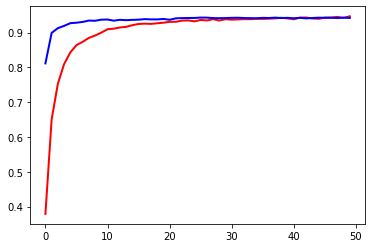

In [11]:
#plt.plot(av_of_kfold(run_arrays_train), 'g', lw = 2) 
#plt.plot(av_of_kfold(run_arrays_val), 'b', lw = 2)
metric = 'categorical_accuracy'
plt.figure()
# more standard 1D architecture
run_arrays_train = []
run_arrays_val = []
val_metric = 'val_' + metric
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('1DCNN/1D_altered/smaller with dropout/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays_train.append(fold[metric])
        run_arrays_val.append(fold[val_metric])
        #plt.plot(fold[metric], 'chartreuse', lw = 0.5)
    fold_num+=1
#plt.plot(av_of_kfold(run_arrays_train), 'r') 
plt.plot(av_of_kfold(run_arrays_val), 'r', lw=2)
#plt.plot(av_of_kfold(run_arrays))

# more standard 1D architecture but smaller
run_arrays_train = []
run_arrays_val = []
val_metric = 'val_' + metric
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('1DCNN/1D_altered/bit smaller/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays_train.append(fold[metric])
        run_arrays_val.append(fold[val_metric])
        #plt.plot(fold[metric], 'chartreuse', lw = 0.5)
    fold_num+=1
#plt.plot(av_of_kfold(run_arrays_train), 'b') 
#plt.plot(av_of_kfold(run_arrays_val), 'c')
#plt.ylim([0.8,1])
"""with open('1DCNN/fold_{}_history.pkl'.format(5), 'rb') as f:
        fold = pkl.load(f)
        plt.plot(fold[metric], 'black')
        plt.plot(fold[val_metric], 'grey')"""

# With batch normalisation 2D
run_arrays = []
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('channel_attention/with_bn/fold_history_saves/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays.append(fold[val_metric])
        #plt.plot(fold['categorical_accuracy'], 'orange', lw = 0.5)
    fold_num+=1
plt.plot(av_of_kfold(run_arrays), 'b', lw = 2) 

plt.savefig()

fold  1
fold  2
fold  3
fold  4
fold  5


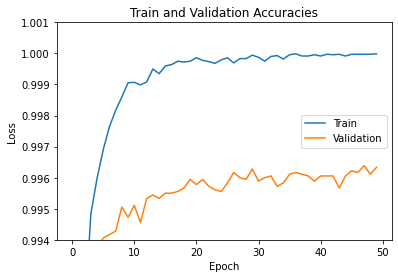

In [182]:
# 2D binary classification
plt.figure()
metrics = ['categorical_accuracy', 'loss']
metric = metrics[0]
run_arrays_train = []
run_arrays_val = []
val_metric = 'val_' + metric
fold_num = 1
for i in range(5):
    print('fold ', fold_num)
    with open('2D_final_model_binary_classification/fold_{}_history.pkl'.format(fold_num), 'rb') as f:
        fold = pkl.load(f)
        run_arrays_train.append(fold[metric])
        run_arrays_val.append(fold[val_metric])
        #plt.plot(fold[metric], 'chartreuse')
    fold_num+=1
plt.plot(av_of_kfold(run_arrays_train)) 
plt.plot(av_of_kfold(run_arrays_val))
plt.title('Train and Validation Accuracies')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.ylim([0.994,1.001])
plt.show()
